# Image Classification
In this exercise, you will be classifying images about clothes. The data set you will be using is called `fashion-small.csv`.

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


In [5]:
# Import your libraries


```py
# Import your libraries
# For data management
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# IF YOU GET AN ERROR HERE run: pip install scikit-image
from skimage import io
from skimage.color import rgb2gray


# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 
```

# 1. Inspect and explore our data
1. Load the `fashion-small.csv` data into a pandas dataframe. 
2. Inspect / remove null values. 
3. Inspect / remove duplicate rows. 
4. Print out the number examples in each class aka the class balances. 
5. Visualize at least one image.

In [ ]:
# 1. Load data into a pandas dataframe. 


```py
# 1. Load data into a pandas dataframe. 
df = pd.read_csv('data/fashion-small.csv')
df.head()
```

### Inspect for null values

In [ ]:
# 2. Inspect / remove null values. 


```py
# 2. Inspect / remove null values. 
df.isnull().sum()
df.isnull().sum().sum()

```

### Check for duplicates

In [ ]:
# 3. Inspect / remove duplicate rows. 


```py
# 3. Inspect / remove duplicate rows. 
# Check for duplicates
df.duplicated().sum()
```

### Lets look at our class balances

In [ ]:
# 4. Print out the number examples in each class aka the class balances. 


```py
# 4. Print out the number examples in each class aka the class balances. 
df.label.value_counts(), df.label.value_counts(normalize=True)
```

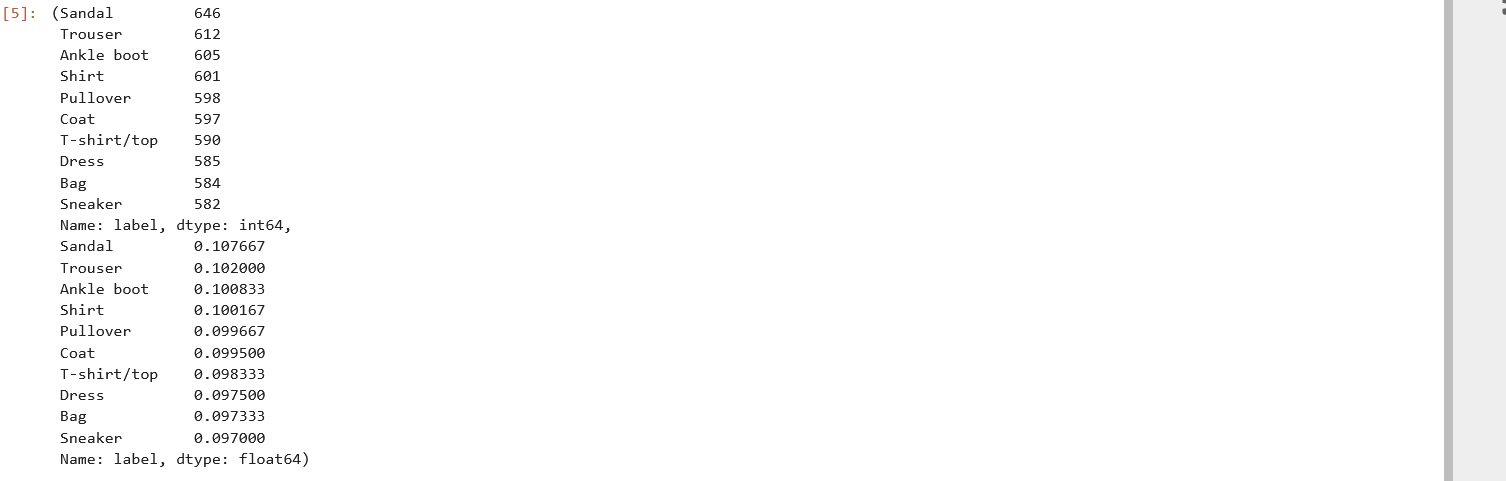

# Visualize one image

## First, we need to create a list that is just our pixel columns

In [ ]:
# Grabs all of the columns 


# Convert the all columns object into a regular list


# Sanity check that it is now just a list.


# Remove just the label column from the list



```py
# Grabs all of the columns 
pixel_cols = df.columns

# Convert the all columns object into a regular list
print(type(pixel_cols))

pixel_cols = list(pixel_cols)

# Sanity check that it is now just a list.
print(type(pixel_cols))

# Remove just the label column from the list
pixel_cols.remove('label')

```

## Extract one row and reshape it to its original 28x28 shape and plot the reshaped image.

In [ ]:
# Select just the pixel columns and convert them to a numpy array by using .values. 


# Select just one image from all the images


# Reshape the image to be a 28x28 matrix (original format of image)


# Plot reshaped image

```py
# Select just the pixel columns and convert them to a numpy array by using .values. 
plt.figure(figsize=(8,8))


# Select just one image from all the images
imgs = df[pixel_cols].values
print(type(imgs))
img = imgs[999]


# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img, cmap='gray')
```

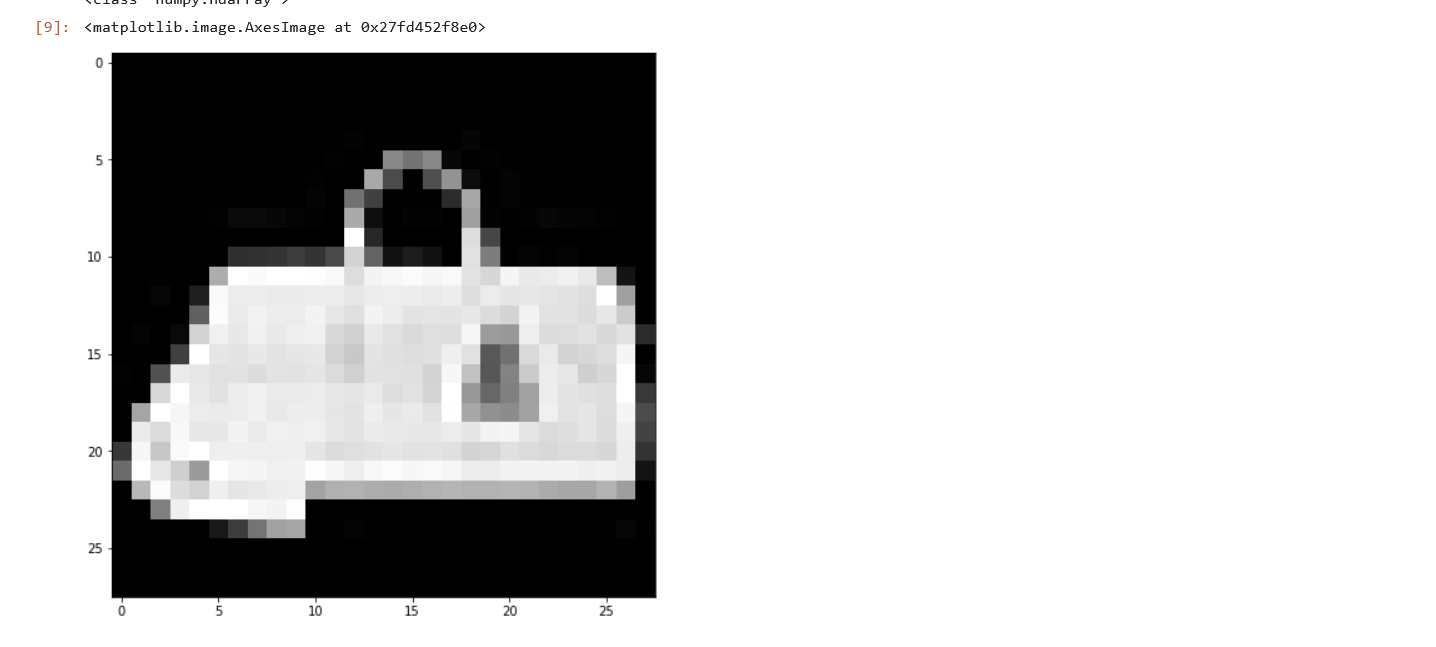

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [ ]:
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = ???


# Convert the all columns object into a regular list


# Sanity check that it is now just a list.


# Remove the label column from the list
# This happnes 'in place'


```py
# DOING THIS AGAIN JUST FOR PRACTICE 

# Grabs all of the columns 
selected_features = df.columns


# Convert the all columns object into a regular list
selected_features = list(selected_features)

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# This happnes 'in place'
selected_features.remove('label')

```

### 2. Define our `X` and `y`

In [ ]:
# 2. Define our `X` and `y` data. 

X = df[???]

y = df[???]

```py
# 2. Define our `X` and `y` data. 

X = df[selected_features]

y = df['label']
```

### 3. Train-test-split our `X` and `y` data

In [ ]:
# 3. Train-test-split our `X` and `y` data


```py

print(df.shape)
df.label.value_counts()

```

```py
# 3. Train-test-split our `X` and `y` data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25)
```



____
# 3. Build and train our model
1. Initalize an empty Support Vector Classifier model.
2. Fit that model with our training data. 

In [ ]:
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier

In [ ]:
# 2. Fit that model with our training data. 


```py
# 1. Initalize an empty Support Vector Classifier model.
from sklearn import svm

# Initalize our Support Vector Classifier
model = svm.SVC()
```

```py
# 2. Fit that model with our training data. 
model.fit(X_train, y_train)
```

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Get a baseline accuracy score.

In [ ]:
### 1. Get and print a baseline accuracy score.
accuracy = ???
print("Accuracy %f" % accuracy)

```py
### 1. Get and print a baseline accuracy score.
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy)
```

### 2. Make new predictions using our test data. 

In [ ]:
### 2. Make new predictions using our test data. 


```py
### 2. Make new predictions using our test data. 
y_pred = model.predict(X_test)

```

### 3. Print the classification report. 
Use the sklearn helper fuction for this. 

In [ ]:
### 3. Print the classification report. 



```py
### 3. Print the classification report. 

print(metrics.classification_report(y_test, y_pred))
```

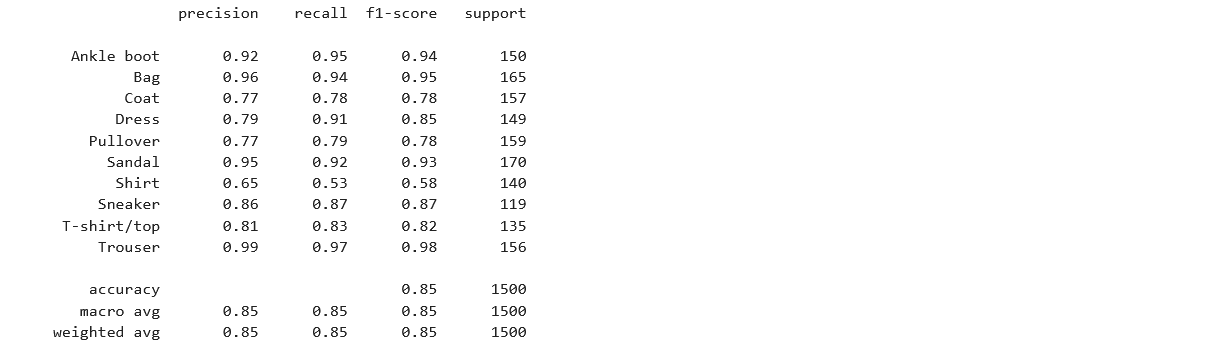

### 4. Plot the confusion matrix of our predicted results. 

In [8]:
### 4. Plot the confusion matrix of our predicted results.


```py
### 4. Plot the confusion matrix of our predicted results.
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)
```

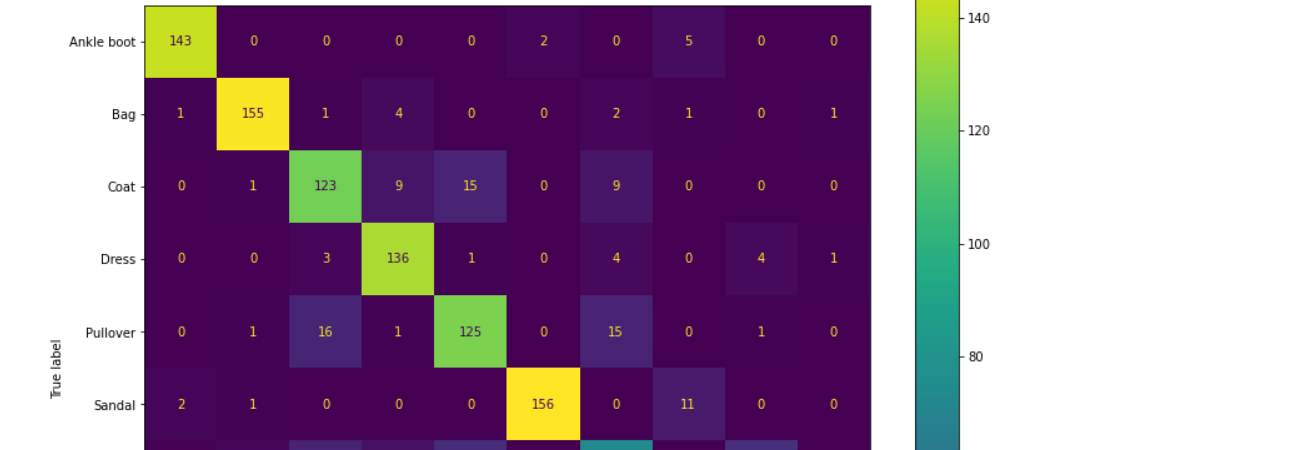

### Looking at the confusion matrix, which two clothing items were mis-classfied with eachother the most?

In [4]:
print('The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.')

The classifier mistaked YOUR_ANSWER_HERE and YOUR_ANSWER_HERE the most.


___
### Build a function thats input is an unfitted model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 

In [ ]:
### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    ???

```py

### Build a function thats input is an empty model, X, and y data, and runs the whole pipeline and prints a classification report and confusion matrix. 
def build_and_eval_model(model, X, y, random_state=23):
    print("Running report for model", model)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)    
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy)
    
    
    # Make new predictions
    y_pred = model.predict(X_test)
    
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
        
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test, 
                                  y_true=y_test, 
                                  ax=ax)

    # Return the fitted model. 
    return model

```

## Run LogisticRegression, RandomForest, and Multinomial Naive Bayes through the function you just built and compare the results. 
1. Which classifier did the best, and which classifier did the worst. 

In [ ]:
# LogisticRegression


In [ ]:
# RandomForest


In [ ]:
# MultinomialNB


In [3]:
print('YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.')

 YOUR_ANSWER_HERE model did the best and YOUR_ANSWER_HERE model did the worst.


```py
# LogisticRegression
lr = LogisticRegression()
build_and_eval_model(lr, X, y)
```

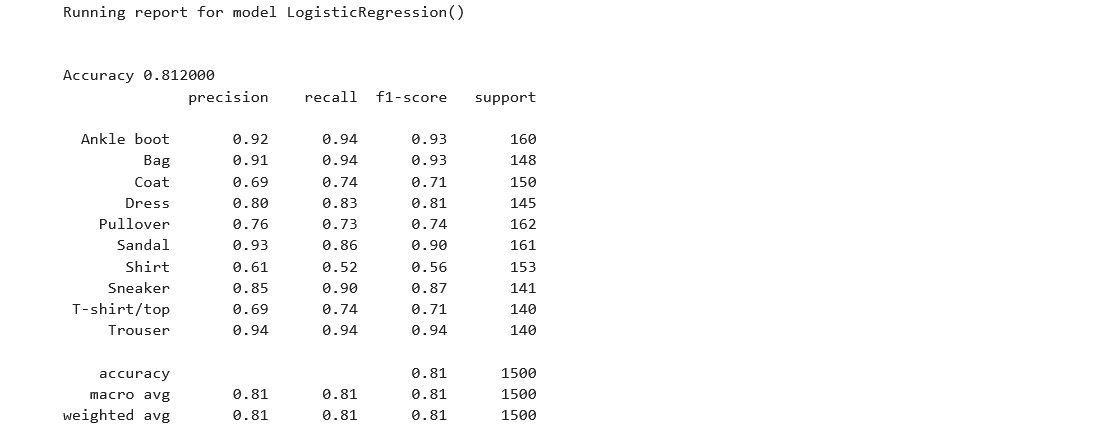

```py
# LogisticRegression
lr = LogisticRegression()
build_and_eval_model(lr, X, y)
```

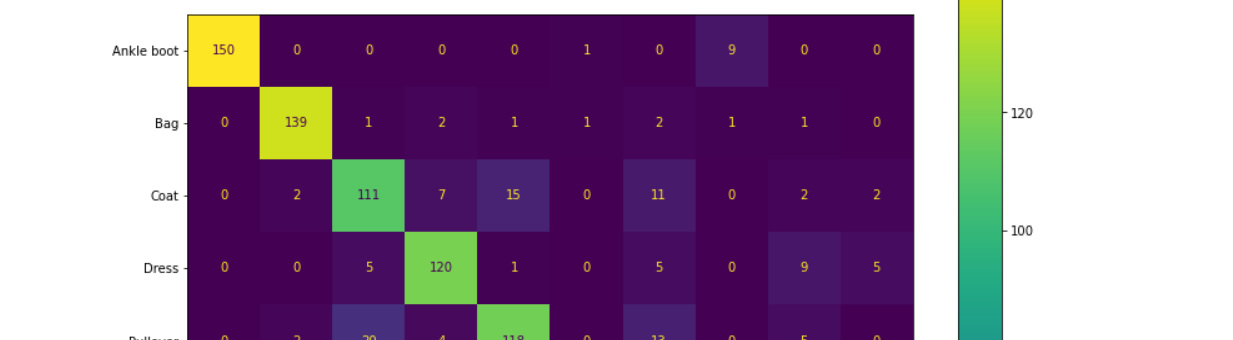


```py
# RandomForest
rf = RandomForestClassifier()

build_and_eval_model(rf, X, y)
```

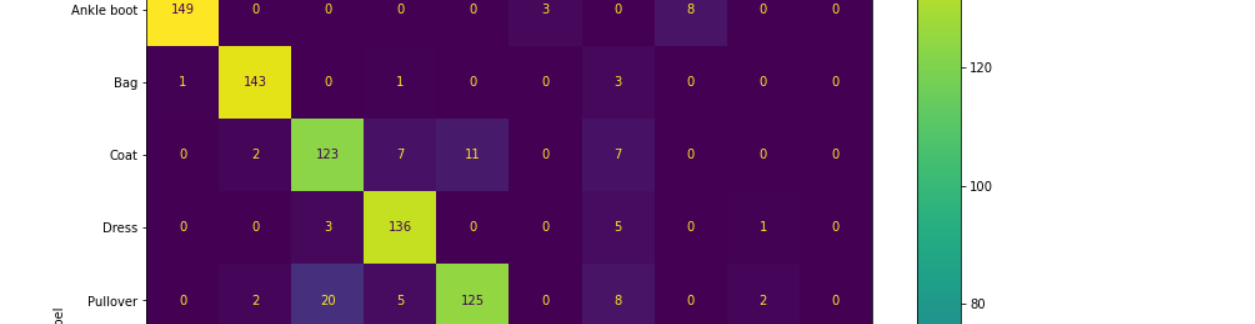

```py
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

```

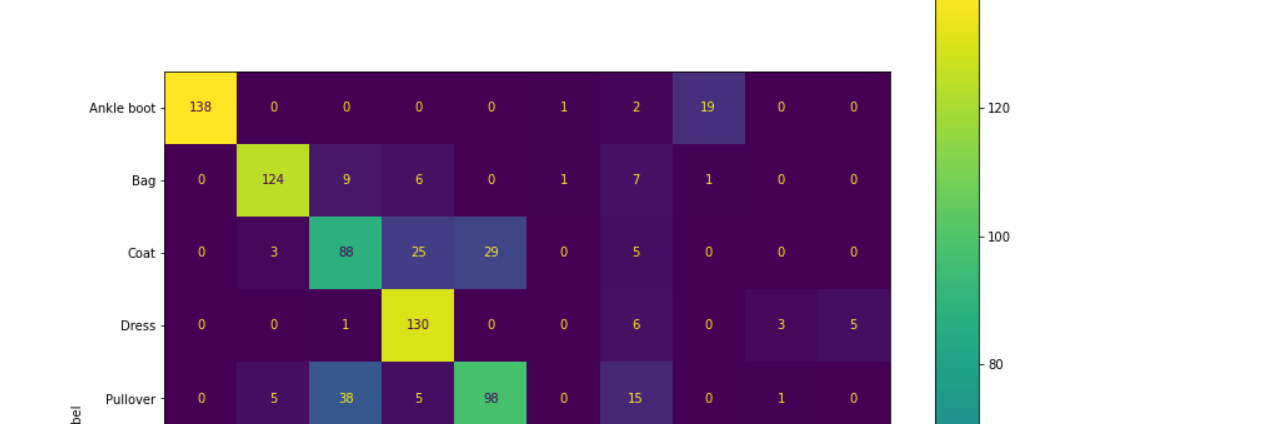



# Dope Extra Credit
### This is going to take some python trickery to get working.  The files are large, in all sorts of strange directories, and in color.  This will not only challenge your data science skills, but also your general 'hacker' skills. 

* Use this data provided Intel to build a classifier for color images in directories: 
* [https://www.kaggle.com/datasets/puneet6060/intel-image-classification](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)
* If you have any issues, just slack me.  I got slack on my phone and love hearing your battle stories 

```py

```